In [25]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


gdf = gpd.read_file(r"C:\Users\TRUE TECH\Downloads\sample.geojson")

print(gdf.head(5))

     osm_id  code       fclass                         name   ref oneway  \
0   9929693  5114    secondary   شارع دكتور على مصطفى مشرفه  None      F   
1  24228847  5115     tertiary  شارع الشهيد محمد السيد حنفى  None      F   
2  24450793  5114    secondary               ميدان عزبة سعد  None      F   
3  24662354  5122  residential                شارع ابن شجاع  None      B   
4  25185997  5112        trunk             طريق قناه السويس  None      F   

   maxspeed  layer bridge tunnel  ...    label  confidence  \
0         0      0      F      F  ...     none        0.95   
1         0      0      F      F  ...    crack        0.93   
2         0      0      F      F  ...     none        0.66   
3         0      0      F      F  ...    crack        0.80   
4         0      0      F      F  ...  pothole        0.63   

                image         lon        lat      x1      y1      x2      y2  \
0  image_29ead06c.jpg   -1.909644  72.458964  0.1672  0.2710  0.3152  0.5201   
1  image_b

In [26]:
cracks_df = gdf[gdf["label"] != "none"]

In [27]:
cracks_df = gdf[gdf["label"] != "none"]

speed_cracks = (
    cracks_df.groupby(["maxspeed", "label"])
    .size()
    .reset_index(name="count")
)



In [28]:
speed_cracks

,maxspeed,label,count
0,0,crack,2557
1,0,pothole,2444
2,0,wear,2477
3,60,crack,1
4,60,pothole,2
5,60,wear,1
6,70,crack,4
7,70,pothole,1
8,90,crack,2
9,90,wear,1


In [29]:
pivot_speed = speed_cracks.pivot(
    index="maxspeed", columns="label", values="count"
).fillna(0)


In [30]:
pivot_speed

label,crack,pothole,wear
maxspeed,,,
0,2557.0,2444.0,2477.0
60,1.0,2.0,1.0
70,4.0,1.0,0.0
90,2.0,0.0,1.0
100,4.0,3.0,6.0
120,1.0,0.0,0.0


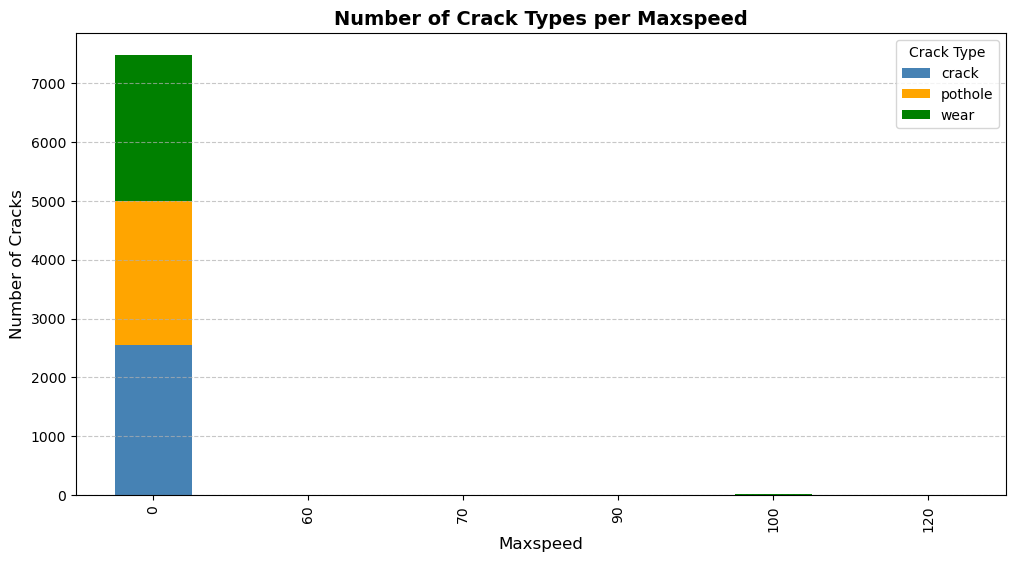

In [31]:
colors = {"crack": "steelblue", "pothole": "orange", "wear": "green"}

pivot_speed.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    color=[colors.get(col, "gray") for col in pivot_speed.columns]
)
plt.title("Number of Crack Types per Maxspeed", fontsize=14, fontweight="bold")
plt.xlabel("Maxspeed", fontsize=12)
plt.ylabel("Number of Cracks", fontsize=12)
plt.legend(title="Crack Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


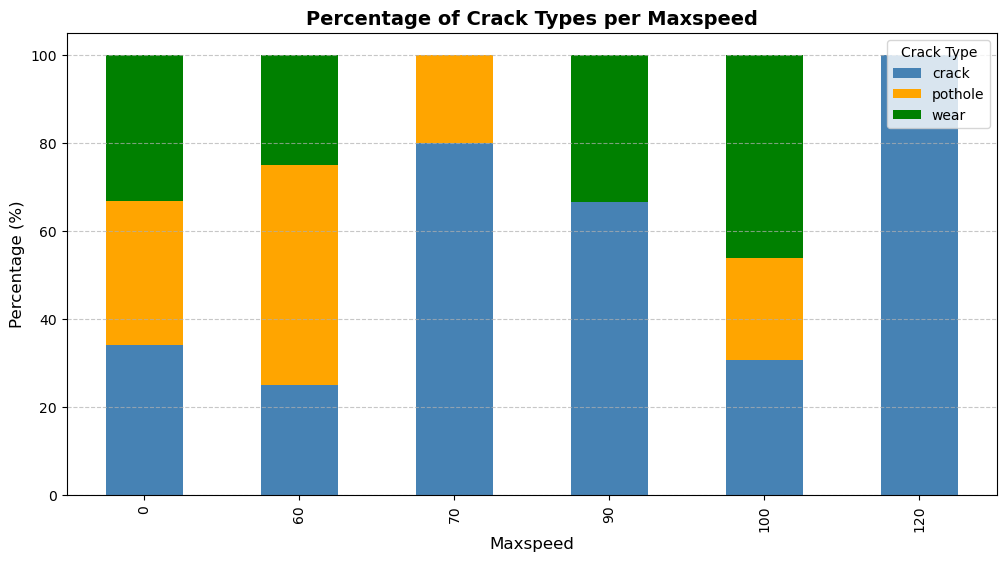

In [32]:
pivot_percent = pivot_speed.div(pivot_speed.sum(axis=1), axis=0) * 100
pivot_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    color=[colors.get(col, "gray") for col in pivot_percent.columns]
)
plt.title("Percentage of Crack Types per Maxspeed", fontsize=14, fontweight="bold")
plt.xlabel("Maxspeed", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.legend(title="Crack Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


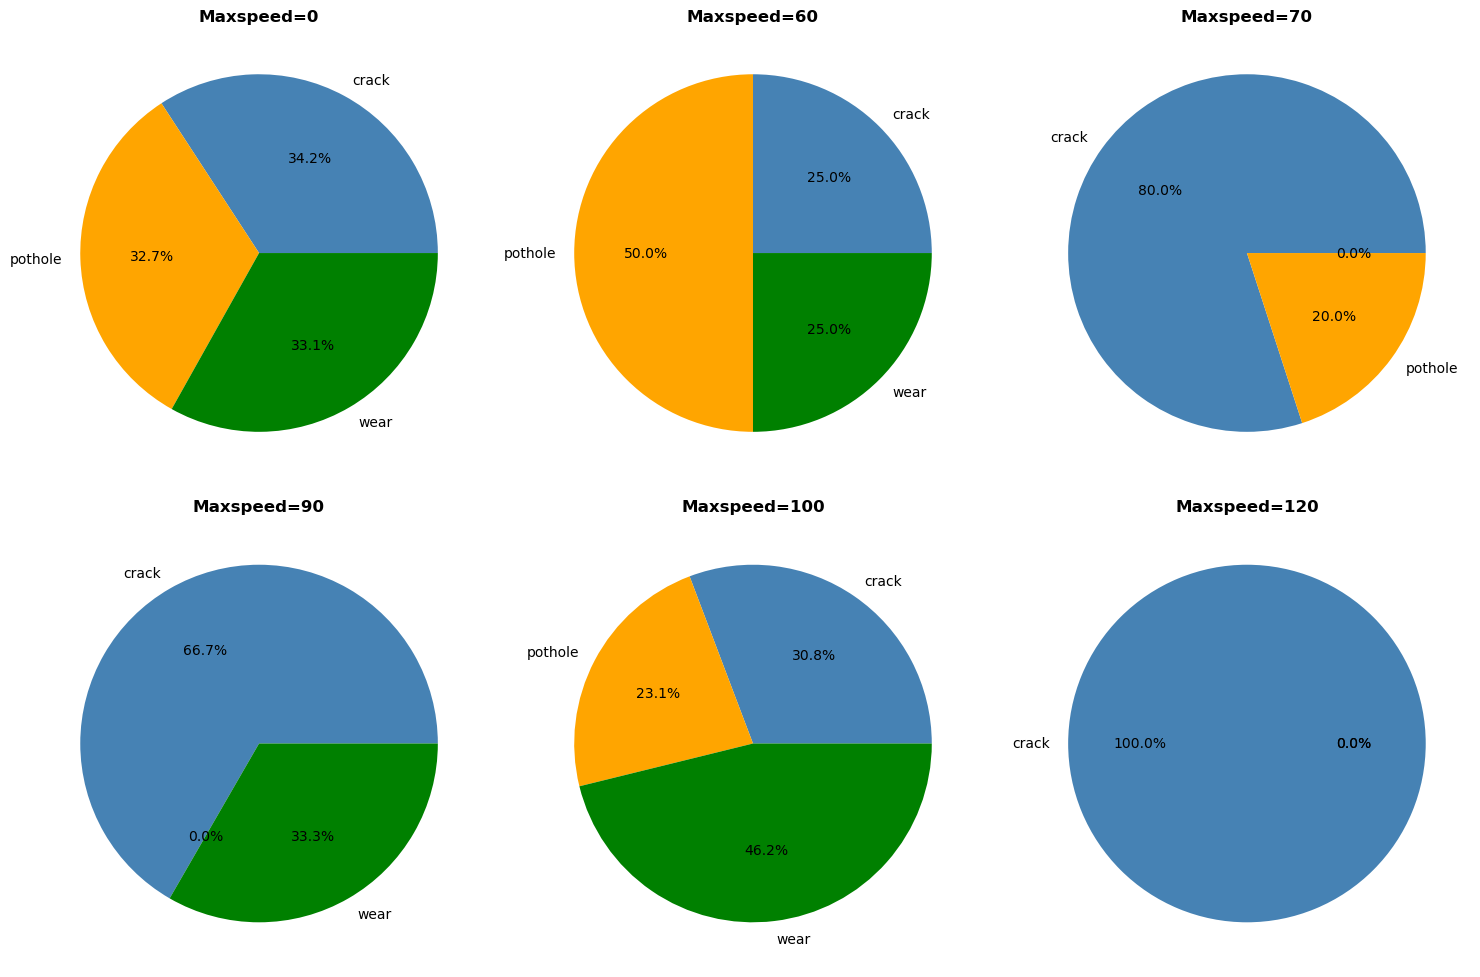

In [33]:
import matplotlib.pyplot as plt

colors = {"crack": "steelblue", "pothole": "orange", "wear": "green"}

n = len(pivot_speed.index)
cols = 3   
rows = (n + cols - 1) // cols 

fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
axes = axes.flatten()

for i, speed in enumerate(pivot_speed.index):
    pivot_speed.loc[speed].plot(
        kind="pie",
        autopct="%1.1f%%",
        colors=[colors.get(col, "gray") for col in pivot_speed.columns],
        ax=axes[i]
    )
    axes[i].set_title(f"Maxspeed={speed}", fontsize=12, fontweight="bold")
    axes[i].set_ylabel("")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

